In [7]:
from sympy import *
from sympy.plotting import plot
import numpy as np
import matplotlib.pyplot as plt

init_printing(use_unicode=False, wrap_line=False, no_global=True)
x,y = symbols ('x,y')

# Approximation

## Mean squared error (MSE)

In [8]:
def print_points_and_function (sympy_function):
    def function (x_): return float (sympy_function.subs(x, x_))

    points_X = np.array ([-3, -2, -1, 1, 2, 3])
    points_Y = np.array ([15, 8, 13, 10, 15, 30])
    plt.xlim (-25, 7.5)
    plt.ylim (-1, 40)
    
    plt.scatter (points_X, points_Y, c='r')
    x_range = np.linspace(plt.xlim()[0],plt.xlim()[1], num=100)
    
    function_Y = [function(x_) for x_ in x_range]
    plt.plot (x_range, function_Y, 'b')
    plt.show()
    
    MSE = sum ([(points_Y[i] - function (points_X[i]))**2 for i in range (len (points_Y))]) / len (points_Y)
    print (f'MSE = {MSE}')

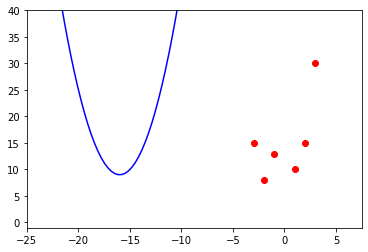

MSE = 68981.16666666667


In [9]:
f = x**2 + 32*x + 265
print_points_and_function (f)

## Square function transformation. Offset along OX

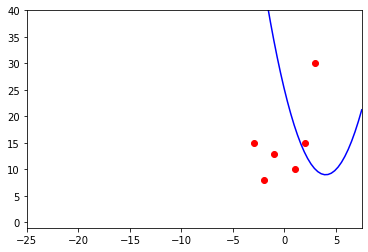

MSE = 687.8333333333334


In [10]:
# To move along OX you have to substract from x
f_new = f.subs(x, x - 20)
display (f_new)

# expand symplifies the function with the new argument
display (expand (f_new))
print_points_and_function(f_new)

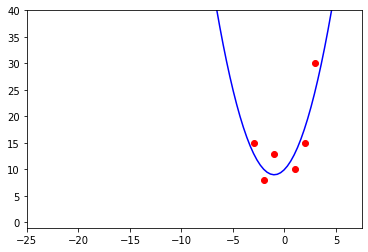

MSE = 11.166666666666666


In [11]:
# roll back on 5 point to the left
f_new2 = expand(f_new.subs(x, x + 5))
print_points_and_function(f_new2)

## Square function transformation. Compression along OY

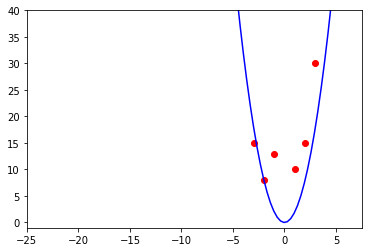

MSE = 64.5


In [12]:
# To compress/stretch the function you have to multiply it
f = x**2 / 3

# instead of .subs() you simply multiply the f
f_new = 6 * f
print_points_and_function(f_new)

# Multivariable functions

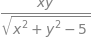

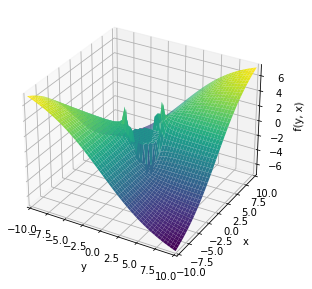

In [13]:
from sympy.plotting import plot3d 
x, y = symbols ('x, y')

f = x * y / sqrt(x**2 + y**2 - 5)
display (f)
plot3d (f)

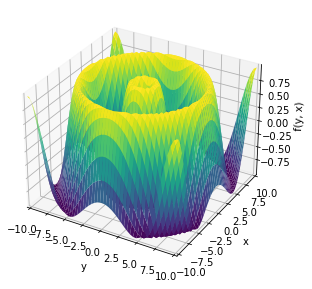

In [14]:
f = sin(sqrt(x ** 2 + y ** 2))
display (f)
plot3d (f)

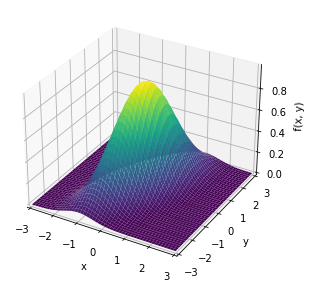

In [15]:
f = exp(-0.9*x**2 -0.45*(x-y)**2)
display (f)

#restrictions for the graph
plot3d(f, (x,-3,3), (y,-3,3))

## zeroes of multivariable functions

In [16]:
# A case of dependent variables
f1 = 5 * x - 3 * y + 2
display(f1)
solve(f1)

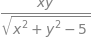

In [17]:
# A case of independent variables
f2 = x * y / sqrt(x**2 + y**2 - 5)
display(f2)
solve(f2)

## Exercises

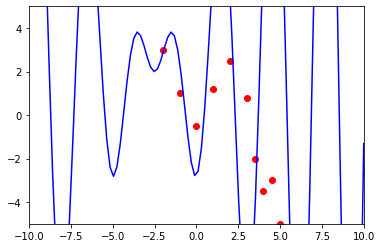

MSE = 90.56454338961888


In [18]:
# Minimize MSE down to 0.75 by elementary transformations of f1

f1 = 2 * x * sin(2 * x + 5) + 5 * sin(2 * x + 5) + 2

def print_points_and_function_1 (sympy_function):
    def function(x_): return float(sympy_function.subs(x, x_))
    
    points_X = np.array([-2, -1, 0, 1, 2, 3, 3.5, 4, 4.5, 5])
    points_Y = np.array([3, 1, -0.5, 1.2, 2.5, 0.8, -2, -3.5, -3, -5])
    plt.xlim(-10, 10)
    plt.ylim(-5, 5)
    
    plt.scatter(points_X, points_Y, c='r')
    x_range = np.linspace(plt.xlim()[0], plt.xlim()[1], num=100)
    function_Y = [function(x_) for x_ in x_range]
    plt.plot(x_range, function_Y, 'b')
    plt.show()
    
    MSE = sum([(points_Y[i] - function(points_X[i]))**2 for i in range(len(points_Y))]) / len(points_Y)
    print(f'MSE = {MSE}')

display (f1)
print_points_and_function_1 (f1)

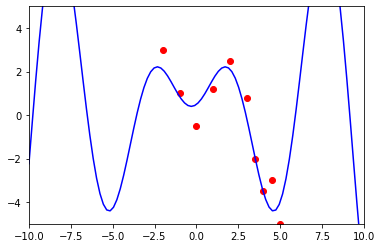

MSE = 0.5929850777381009


In [19]:
# right shift:
f1_1 = f1.subs({x: x - 2.35}).expand()

# stretch along ÐžX:
f1_2 = f1_1.subs({x: x / 2.0}).expand()

# down shift:
f1_3 = f1_2 - 1.6

display (f1_3)
print_points_and_function_1(f1_3)

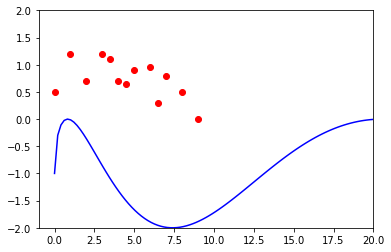

MSE = 4.609003555572037


In [20]:
# Minimize MSE down to 1 by elementary transformations of f2

f2 = sin(sqrt(3) *sqrt(x)) - 1

def print_points_and_function_2(sympy_function):
    def function(x_): return float(sympy_function.subs(x, x_))
    
    points_X = np.array([0, 1, 2, 3, 3.5, 4, 4.5, 5, 6, 6.5, 7, 8, 9])
    points_Y = np.array([0.5, 1.2, 0.7, 1.2, 1.1, 0.7, 0.65, 0.9, 0.95, 0.3, 0.8, 0.5, 0.0])
    plt.xlim(-1, 20)
    plt.ylim(-2, 2)
    
    plt.scatter(points_X, points_Y, c='r')
    x_range = np.linspace(plt.xlim()[0] + 1, plt.xlim()[1], num=100)
    function_Y = [function(x_) for x_ in x_range]
    plt.plot(x_range, function_Y, 'b')
    plt.show()
    
    MSE = sum([(points_Y[i] - function(points_X[i]))**2 for i in range(len(points_Y))]) / len(points_Y)
    print(f'MSE = {MSE}')

display (f2)
print_points_and_function_2(f2)

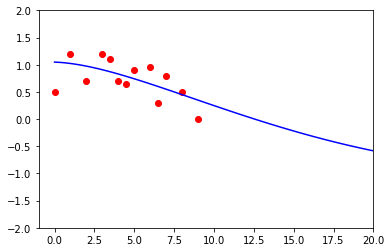

MSE = 0.07488084839467699


In [21]:
# left shift:
f2_1 = f2.subs({x: x + 0.885})

# stretch along OX:
f2_2 = f2_1.subs({x: x / 5})

# up shift:
f2_3 = f2_2 + 1.05

display (f2_3)
print_points_and_function_2(f2_3)

[{x: 0}, {y: 0}]


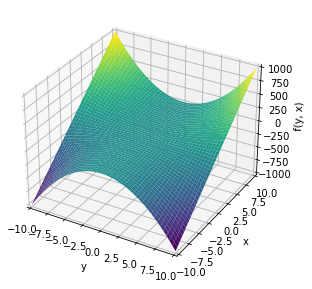

In [22]:
# Draw graphs and find zeroes. Draw graphs of the zeroes, unless they are constants

f = x*y**2
display (f)
print (solve (f))
plot3d (f)

[{x: 0}, {x: 1}, {y: 0}]


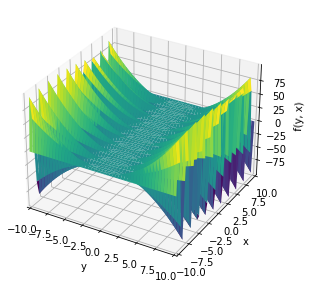

In [23]:
# Draw graphs and find zeroes. Draw graphs of the zeroes, unless they are constants
f=y**2*sin(pi*x)
display (f)
print (solve (f))
plot3d (f)

[{x: 0}, {x: pi}, {y: 2}, {y: 2 + pi}]


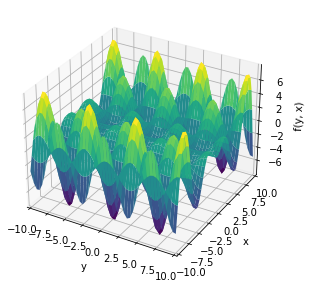

In [24]:
# Draw graphs and find zeroes. Draw graphs of the zeroes, unless they are constants

f = x*sin(x) * sin(y - 2)
display (f)
print (solve (f))
plot3d (f)